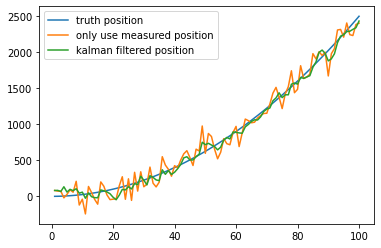

In [1]:
import numpy as np


t = np.linspace(1,100,100) # 在1~100s内采样100次
a = 0.5 # 加速度值
position = (a * t**2)/2

position_noise = position+np.random.normal(0,120,size=(t.shape[0])) # 模拟生成GPS位置测量数据（带噪声）
import matplotlib.pyplot as plt
plt.plot(t,position,label='truth position')
plt.plot(t,position_noise,label='only use measured position')


#---------------卡尔曼滤波----------------
# 初始的估计导弹的位置就直接用GPS测量的位置
predicts = [position_noise[0]]
position_predict = predicts[0]

predict_var = 0
odo_var = 120**2 #这是我们自己设定的位置测量仪器的方差，越大则测量值占比越低
v_std = 50 # 测量仪器的方差（这个方差在现实生活中是需要我们进行传感器标定才能算出来的，可搜Allan方差标定）
for i in range(1,t.shape[0]):
  
    dv =  (position[i]-position[i-1]) + np.random.normal(0,50) # 模拟从IMU读取出的速度
    position_predict = position_predict + dv # 利用上个时刻的位置和速度预测当前位置
    predict_var += v_std**2 # 更新预测数据的方差
    # 下面是Kalman滤波
    position_predict = position_predict*odo_var/(predict_var + odo_var)+position_noise[i]*predict_var/(predict_var + odo_var)
    predict_var = (predict_var * odo_var)/(predict_var + odo_var)
    predicts.append(position_predict)

    
plt.plot(t,predicts,label='kalman filtered position')

plt.legend()
plt.show()

In [2]:
import ipykernel
ipykernel.__version__


'5.5.6'

# 实现细节

In [4]:
import numpy as np


t = np.linspace(1,100,100) # 在1~100s内采样100次
t

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [6]:
a = 0.5 # 加速度值
position = (a * t**2)/2
position

array([2.50000e-01, 1.00000e+00, 2.25000e+00, 4.00000e+00, 6.25000e+00,
       9.00000e+00, 1.22500e+01, 1.60000e+01, 2.02500e+01, 2.50000e+01,
       3.02500e+01, 3.60000e+01, 4.22500e+01, 4.90000e+01, 5.62500e+01,
       6.40000e+01, 7.22500e+01, 8.10000e+01, 9.02500e+01, 1.00000e+02,
       1.10250e+02, 1.21000e+02, 1.32250e+02, 1.44000e+02, 1.56250e+02,
       1.69000e+02, 1.82250e+02, 1.96000e+02, 2.10250e+02, 2.25000e+02,
       2.40250e+02, 2.56000e+02, 2.72250e+02, 2.89000e+02, 3.06250e+02,
       3.24000e+02, 3.42250e+02, 3.61000e+02, 3.80250e+02, 4.00000e+02,
       4.20250e+02, 4.41000e+02, 4.62250e+02, 4.84000e+02, 5.06250e+02,
       5.29000e+02, 5.52250e+02, 5.76000e+02, 6.00250e+02, 6.25000e+02,
       6.50250e+02, 6.76000e+02, 7.02250e+02, 7.29000e+02, 7.56250e+02,
       7.84000e+02, 8.12250e+02, 8.41000e+02, 8.70250e+02, 9.00000e+02,
       9.30250e+02, 9.61000e+02, 9.92250e+02, 1.02400e+03, 1.05625e+03,
       1.08900e+03, 1.12225e+03, 1.15600e+03, 1.19025e+03, 1.225

In [7]:
position_noise = position+np.random.normal(0,120,size=(t.shape[0])) # 模拟生成GPS位置测量数据（带噪声）
position_noise

array([ -72.00658973,   59.48542507,   65.88242428,   29.62864785,
        252.47895337,   57.86088151,  165.00158493,  125.68582142,
         49.0979358 , -114.12165201,   64.76072536,  148.31616843,
         44.84439219,   79.29215003,  135.99368876,  122.16730607,
        230.5115723 ,  241.41687442,  188.00960037,  172.50177471,
        114.43810177,  202.19323573,  192.71712711,   33.87200499,
        337.38773863,  -16.2709299 ,   79.48451009,  163.305164  ,
        216.11894036,  197.29663914,  339.61248909,  309.23203913,
        453.99733924,  348.09520386,  420.85768738,  100.0885769 ,
        306.55841846,  206.54321755,  394.04077482,  370.6368073 ,
        423.22013788,  628.00292409,  380.97185402,  260.58230957,
        584.50895507,  341.12371688,  475.90769762,  179.27205355,
        736.69342075,  765.78574032,  585.20038408,  663.07809416,
        878.92464224,  579.84812675,  617.17664905,  876.83080645,
        765.10593612,  824.89210164,  823.67932626,  921.68530

In [9]:
# 初始的估计导弹的位置就直接用GPS测量的位置
predicts = [position_noise[0]]
position_predict = predicts[0]
print(predicts)
print(position_predict)


[-72.00658973454976]
-72.00658973454976
